# __Unsupervised Learning and Preprocessing__

Unsupervised learning subsumes all kinds of machine
learning where there is no known output, no teacher to instruct the learning algorithm. In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.

__Unsupervised transformations__ of a dataset are algorithms that create a new representa‐
tion of the data which might be easier for humans or other machine learning algo‐
rithms to understand compared to the original representation of the data. A common
application of unsupervised transformations is dimensionality reduction, which takes
a high-dimensional representation of the data, consisting of many features, and finds
a new way to represent this data that summarizes the essential characteristics with
fewer features. A common application for dimensionality reduction is reduction to
two dimensions for visualization purposes.

__Clustering algorithms__, on the other hand, partition data into distinct groups of similar
items.

Unsupervised algorithms are used often in an exploratory setting,
when a data scientist wants to understand the data better, rather than as part of a
larger automatic system. Another common application for unsupervised algorithms
is as a preprocessing step for supervised algorithms. Learning a new representation of
the data can sometimes improve the accuracy of supervised algorithms, or can lead to
reduced memory and time consumption.

## __Preprocessing and Scaling__

In [8]:
import mglearn
import numpy as np

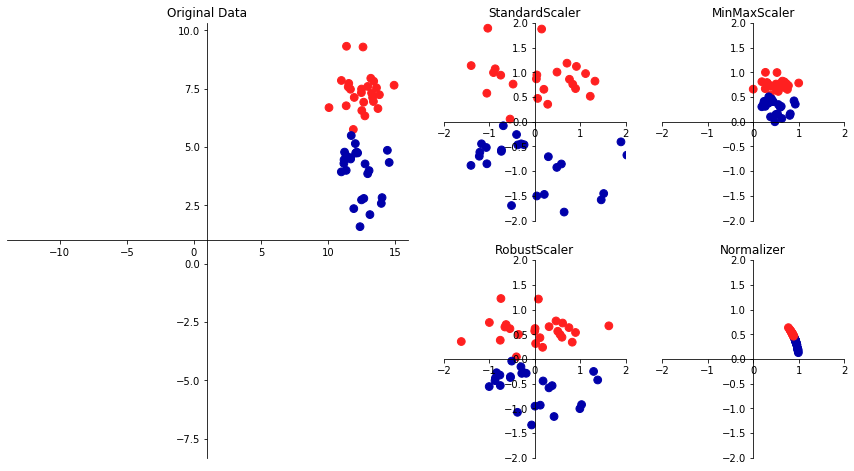

In [9]:
mglearn.plots.plot_scaling()

The __StandardScaler__ in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.

The __RobustScaler__ works similarly to the __StandardScaler__ in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the __RobustScaler__ uses the median and quartiles, 1 instead of
mean and variance. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.

The __MinMaxScaler__ , on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis
between 0 and 1.

Finally, the __Normalizer__ does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

### __Applying Dta Transformation__

Preprocessing methods like the scalers are usually applied before applying a supervised
machine learning algorithm. As an example, say we want to apply the kernel SVM
( SVC ) to the cancer dataset, and use MinMaxScaler for preprocessing the data. We
start by loading our dataset and splitting it into a training set and a test set (we need
separate training and test sets to evaluate the supervised model we will build after the
preprocessing):

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

In [11]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (426, 30)
X_test.shape:  (143, 30)


In [12]:
# importting scaler and instanciating it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

We then fit the scaler using the fit method, applied to the training data. For the Min MaxScaler , the fit method computes the minimum and maximum value of each feature on the training set.

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
# to apply the transformation, we use the transform method of the scaler
# transform data
X_train_scaled = scaler.transform(X_train)

# print dataset properties befor and after scaling
print('transformed shape: ', X_train_scaled.shape)
print('per-feature minimum before scaling:\n', np.array(X_train.min(axis = 0)))
print('per-feature maximum before scaling:\n', X_train.max(axis = 0))
print('per-feature minimum after scaling:\n', X_train_scaled.min(axis = 0))
print('per-feature maximum after scaling:\n', X_train_scaled.max(axis = 0))

transformed shape:  (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same shape as the original data—the features are simply
shifted and scaled.

In [15]:
# transofrm test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print('per-feature minimum after scaling:\n', X_test_scaled.min(axis = 0))
print('per-feature maximum after scaling:\n', X_test_scaled.max(axis = 0))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the __MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.__

### __Scaling Training and Test Data the Same Way__

__It is important to apply exactly the same transformation to the training set and the
test set for the supervised model to work on the test set__. The following example
illustrates what would happen if we were to use the minimum and range
of the test set instead:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

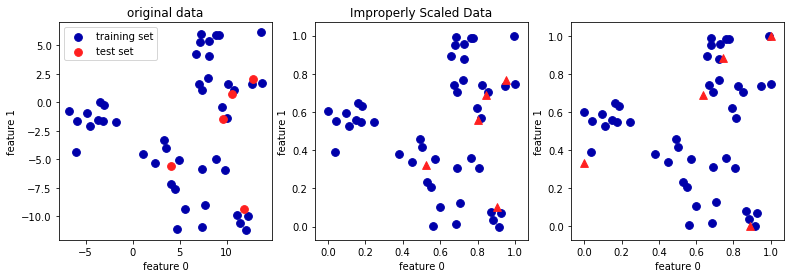

In [16]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# make synthetic data
X, __ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state = 5, test_size = 0.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize = (13, 4))

axes[0].scatter(
    X_train[:, 0], X_train[:, 1], c = mglearn.cm2(0), label = 'training set', s = 60
)
axes[0].scatter(
    X_test[:, 0], X_test[:, 1], c = mglearn.cm2(1), label = 'test set', s = 60
)

axes[0].legend(loc = 'upper left')
axes[0].set_title('original data')

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],c = mglearn.cm2(0), label = "Training set", s = 60
)
axes[1].scatter(
    X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2(1), label = "Test set", s = 60
)
axes[1].set_title("Scaled Data")


# re-scale the test set separately
# so test set min is 0 and test set max is 1
# just for illustration purposes
test_scaler = MinMaxScaler().fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],c = mglearn.cm2(0), label = "Training set", s = 60
)
axes[2].scatter(
    X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^', c = mglearn.cm2(1), label = "Test set", s = 60
)
axes[1].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

The third panel shows what would happen if we scaled the training set and test set
separately. In this case, the minimum and maximum feature values for both the train‐
ing and the test set are 0 and 1. But now the dataset looks different. The test points
moved incongruously to the training set, as they were scaled differently. We changed
the arrangement of the data in an arbitrary way. Clearly this is not what we want to
do.

In [17]:
# we can use a shhortcut and more efficient manner
# of fitting and transforming the dataset using fit_transform() method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

# While fit_transform is not necessarily more efficient for all models, it is still good
# practice to use this method when trying to transform the training set.

### __The Effect of Preprocessing on Supervised Learning__

In [18]:
# let's use MinMaxScaler on learning the SVC
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C = 100)
svm.fit(X_train, y_train)
print(f'test set accuracy: {svm.score(X_test, y_test):.3f}')

test set accuracy: 0.944


In [19]:
# now let's scale the data using MinMaxScaler before fitting the SVC
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f'test set accuracy: {svm.score(X_test_scaled, y_test):.3f}')

test set accuracy: 0.965


In [20]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled trainign data
svm.fit(X_train_scaled, y_train)

# scaring on the scaled test set
print(f'SVM test accuracy: {svm.score(X_test_scaled, y_test):.3f}')

SVM test accuracy: 0.958


### __Dimensionality Reduction, Feature Extraction, and Manifold Learning__

As we discussed earlier, transforming data using unsupervised learning can have
many motivations. The most common motivations are visualization, compressing the
data, and finding a representation that is more informative for further processing.
One of the simplest and most widely used algorithms for all of these is principal com‐
ponent analysis. We’ll also look at two other algorithms: non-negative matrix factori‐
zation (NMF), which is commonly used for feature extraction, and t-SNE, which is
commonly used for visualization using two-dimensional scatter plots.

### __Principal component Analysis (PCA)__

Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated. This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data.

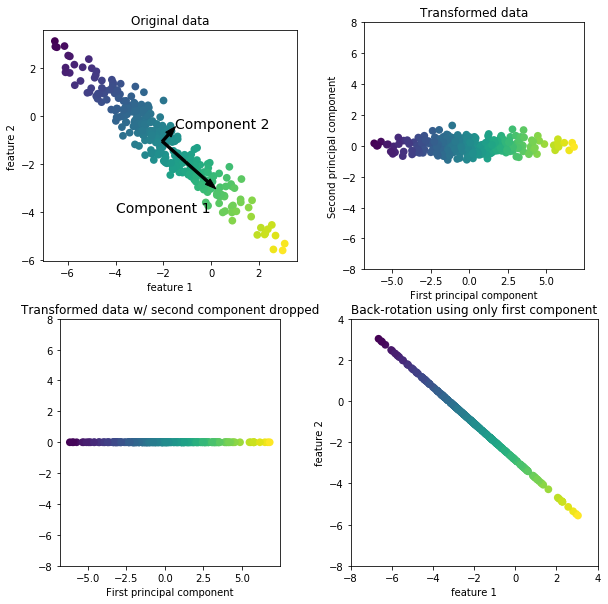

In [21]:
mglearn.plots.plot_pca_illustration()

- The algorithm proceeds by first finding the direction of maximum variance,
labeled “Component 1.” This is the direction (or vector) in the data that contains most
of the information, or in other words, the direction along which the features are most
correlated with each other.

- Then, the algorithm finds the direction that contains the
most information while being orthogonal (at a right angle) to the first direction.

The directions found using this pro‐
cess are called principal components, as they are the main directions of variance in the
data. In general, there are as many principal components as original features.

#### __Applying PCA to cancer dataset for visualization__

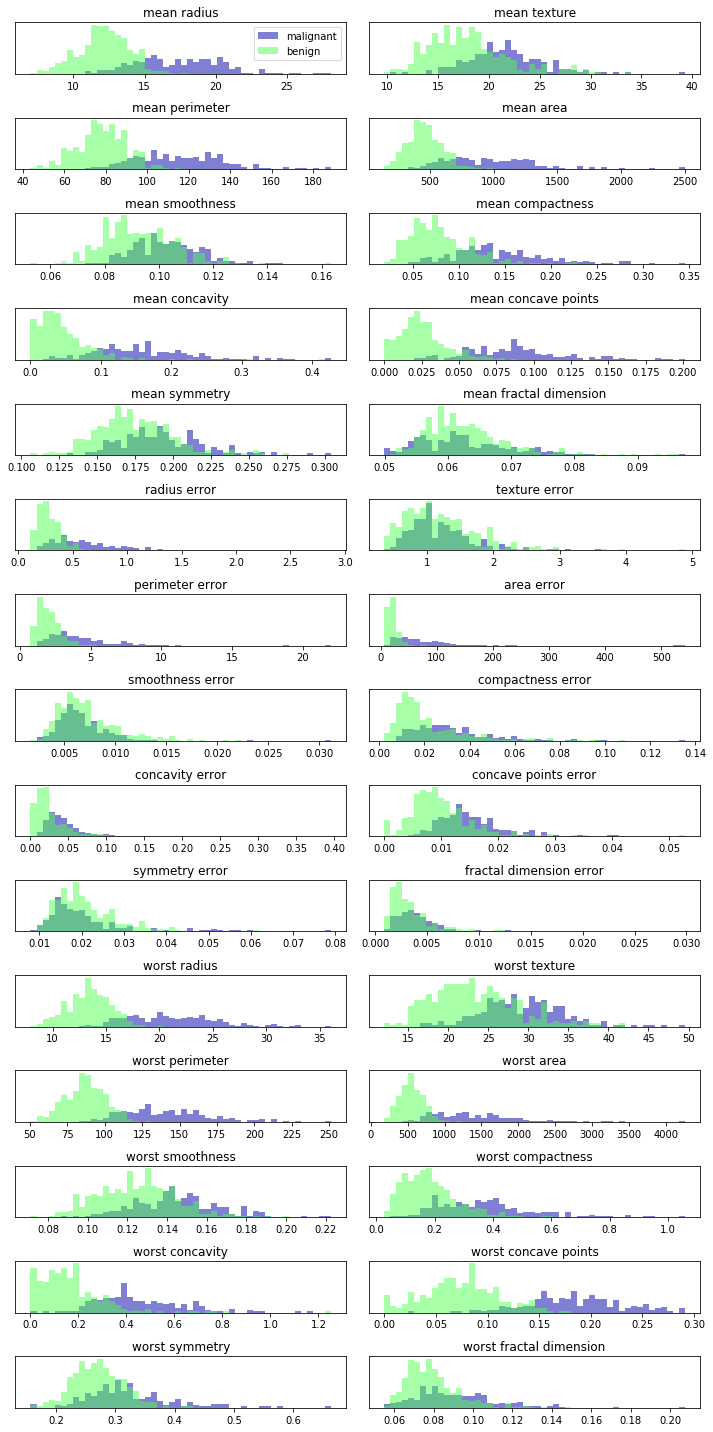

In [28]:
# compute histograms of each of the features for the two classes,
# beningn and malign cancer
import matplotlib.pyplot as plt

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(0, 30):
    __, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].legend(["malignant", "benign"], loc = 'best')
fig.tight_layout()

This gives us some idea of how each feature is distributed
across the two classes, and allows us to venture a guess as to which features are better
at distinguishing malignant and benign samples. For example, the feature “smooth‐
ness error” seems quite uninformative, because the two histograms mostly overlap,
while the feature “worst concave points” seems quite informative, because the histo‐
grams are quite disjoint.
However, this plot doesn’t show us anything about the interactions between variables
and how these relate to the classes. Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal compo‐
nents, and visualize the data in this new two-dimensional space with a single scatter
plot.

In [30]:
# before applying PCA, we scale our data
# so that each feature has unit variance
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [31]:
# apply PCA
from sklearn.decomposition import PCA

# keep the frist two principal components of the data
pca = PCA(n_components = 2)

# fit PCA model to beast cancer data
pca.fit(X_scaled)

# trasnform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print(f'original shape: {str(X_scaled.shape)}')
print(f'reduced shape: {str(X_pca.shape)}')

original shape: (569, 30)
reduced shape: (569, 2)


Text(0, 0.5, 'Second Principal Component')

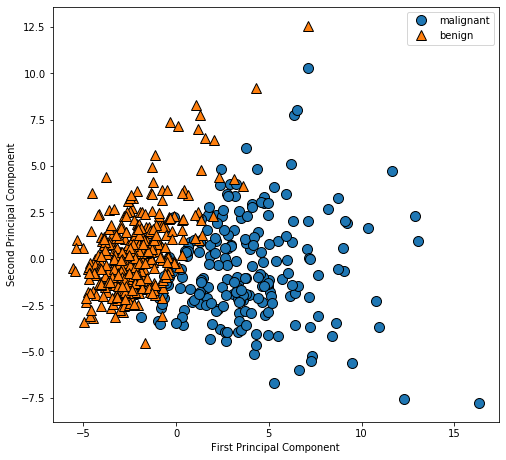

In [33]:
# plot the first two principal components
# colored by class
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

It is important to note that PCA is an unsupervised method, and does not use any class
information when finding the rotation. It simply looks at the correlations in the data.

Visually we can note that malignant points are more spread out than the benigng ones.

The principal components correspond to directions in the original data, so they are
combinations of the original features.

In [34]:
print(f'PCA component shape: {pca.components_.shape}')

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sor‐
ted by their importance (the first principal component comes first, etc.). The columns
correspond to the original features attribute of the PCA in this example, “mean
radius,” “mean texture,” and so on. Let’s have a look at the content of `components_` :

In [35]:
print(f'PCA components:\n{pca.components_}')

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal Components')

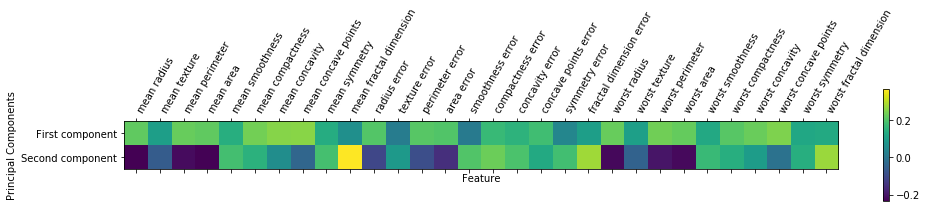

In [37]:
# visualize coefficients using a heat map
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(
    range(len(cancer.feature_names)),
    cancer.feature_names, rotation = 60, ha = 'left'
)
plt.xlabel('Feature')
plt.ylabel('Principal Components')

You can see that in the first component, all features have the same sign (it’s negative,
but as we mentioned earlier, it doesn’t matter which direction the arrow points in).
That means that there is a general correlation between all features. As one measure‐
ment is high, the others are likely to be high as well. The second component has
mixed signs, and both of the components involve all of the 30 features.

### __Eigenfaces for feature extraction__

Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.

(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)


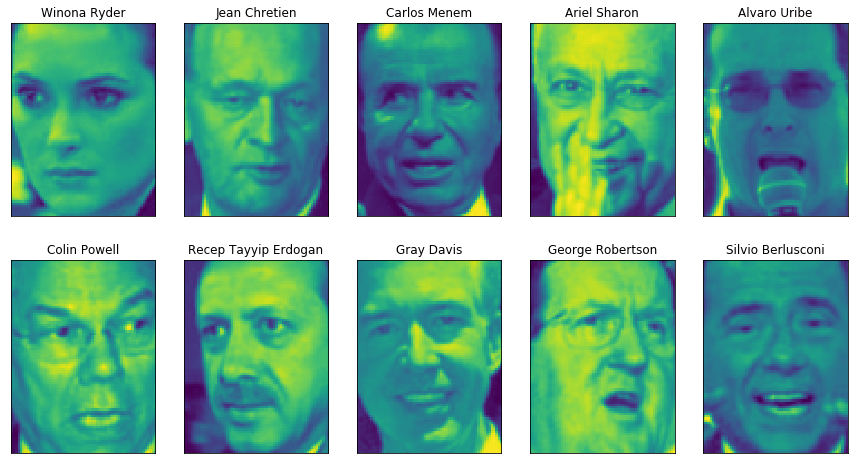

In [88]:
# extract faces images
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shaoe = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    print(image.shape)
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [39]:
print(f'people.images.shape: {people.images.shape}')
print(f'Number of classes: {len(people.target_names)}')

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [42]:
# coutn how often each target appears
counts = np.bincount(people.target)

# prunt counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f'{name:25} {count:3}', end = '     ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39     Alvaro Uribe               35     Amelie Mauresmo            21     
Andre Agassi               36     Angelina Jolie             20     Ariel Sharon               77     
Arnold Schwarzenegger      42     Atal Bihari Vajpayee       24     Bill Clinton               29     
Carlos Menem               21     Colin Powell              236     David Beckham              31     
Donald Rumsfeld           121     George Robertson           22     George W Bush             530     
Gerhard Schroeder         109     Gloria Macapagal Arroyo    44     Gray Davis                 26     
Guillermo Coria            30     Hamid Karzai               22     Hans Blix                  39     
Hugo Chavez                71     Igor Ivanov                20     Jack Straw                 28     
Jacques Chirac             52     Jean Chretien              55     Jennifer Aniston           21     
Jennifer Capriati          42     Jennifer Lopez             21     Jerem

In [43]:
# take up to 50 images of each person
# otherwise the feature extaction would be overwhelmed by
# the likelihod of G. W. Bush
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.0

A common task in face recognition is to ask if a previously unseen face belongs to a
known person from a database. This has applications in photo collection, social
media, and security applications. One way to solve this problem would be to build a
classifier where each person is a separate class. However, there are usually many dif‐
ferent people in face databases, and very few images of the same person (i.e., very few
training examples per class). That makes it hard to train most classifiers. Additionally,
you often want to be able to add new people easily, without needing to retrain a large
model.
A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
`KNeighborsClassifier` does here:

In [52]:
print(X_train[0])
print(X_train[0].shape)
print(X_train.shape)

[0.53594774 0.55947715 0.5647059  ... 0.5294118  0.40392157 0.24313726]
(5655,)
(1547, 5655)


In [57]:
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0
)

# build a KNeighborsClassifier using one neighnor
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

print(f'Test set score of 1-nn: {knn.score(X_test, y_test)}')

Test set score of 1-nn: 0.23255813953488372


We obtain an accuracy of 26.6%, which is not actually that bad for a 62-class classifi‐
cation problem (random guessing would give you around 1/62 = 1.5% accuracy), but
is also not great. We only correctly identify a person every fourth time.

Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representa‐
tion is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distan‐
ces along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale.

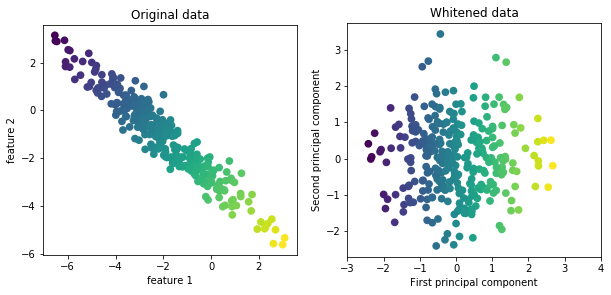

In [58]:
mglearn.plots.plot_pca_whitening()

In [72]:
# fit PCA object to the training data and
# extract the first 100 principal components
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train_pca.shape: {X_train_pca.shape}')

X_train_pca.shape: (1547, 100)


In [73]:
# fit knn classifier to this new transformed data
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print(f'test set accuracy: {knn.score(X_test_pca, y_test)}')

test set accuracy: 0.312015503875969


In [74]:
# improvement on out accuracy on the test set!

In [75]:
# let's look at the first couple of principal components
print(f'pca.components_.shape: {pca.components_.shape}')

pca.components_.shape: (100, 5655)


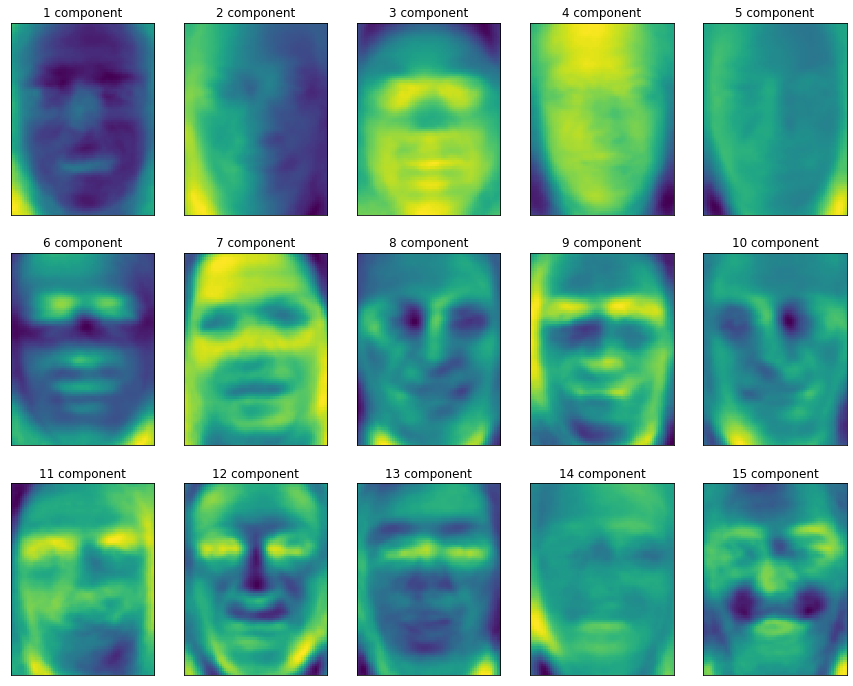

In [99]:
# get the shape of an input image
image_shape = people.images[0].shape

fix, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
             cmap = 'viridis')
    ax.set_title(f'{i + 1} component')

Another way we can try to understand what a PCA model is doing is by looking at
the reconstructions of the original data using only some components.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 2.5s, 0.0min


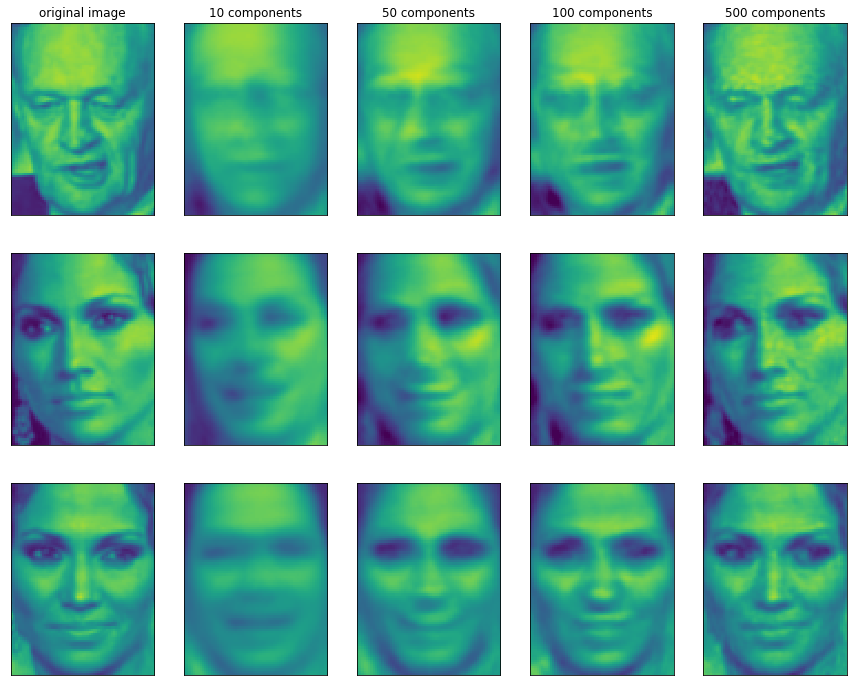

In [100]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

You can see that when we use only the first 10 principal components, only the essence
of the picture, like the face orientation and lighting, is captured. By using more and
more principal components, more and more details in the image are preserved.

We can also try to use PCA to visualize all the faces in the dataset in a scatter plot
using the first two principal components  with classes given by who is
shown in the image, similarly to what we did for the cancer dataset:

Text(0, 0.5, 'Second principal component')

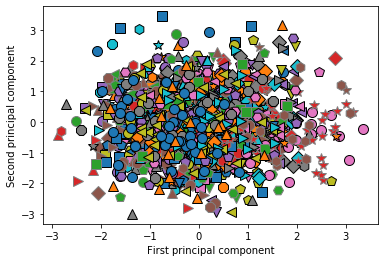

In [102]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

As you can see, when we use only the first two principal components the whole data
is just a big blob, with no separation of classes visible. This is not very surprising,
given that even with 10 components, as shown earlier, PCA only captures very rough characteristics of the faces.

### __Non-Negative Matrix Factorization (NMF)__